In [ ]:
#from st_F import *
import pandas as pd
import numpy as np
#os.chdir('C:\\Users\\User\\all_2022_4_29\\姜林傑佑\\6_6_Python建構策略回測系統\\6_6_Python建構策略回測系統')
import os
# os.chdir('/Users/jochien/Documents/MaxRereach/backtrading/rawdata/crypto_ohlc')
symbol = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/backtrading/rawdata/1D/symbols.csv")['symbol']

currency_plot_list = []
df_volume = []
df_close = []
for ii in range(len(symbol)):
    df_close.append(pd.read_csv('/Users/jochien/Documents/MaxRereach/backtrading/rawdata/1D/' + symbol.iloc[ii]+'.csv',encoding='BIG5')['volume'])
    df_close.append(pd.read_csv('/Users/jochien/Documents/MaxRereach/backtrading/rawdata/1D/' + symbol.iloc[ii]+'.csv',encoding='BIG5')['close'])
df_close = pd.concat(df_close, axis=1)

In [ ]:
df_close

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(df_close)

# 合併所有收盤價

In [1]:


#from st_F import *
import pandas as pd
import numpy as np
import seaborn as sns

#os.chdir('C:\\Users\\User\\all_2022_4_29\\姜林傑佑\\6_6_Python建構策略回測系統\\6_6_Python建構策略回測系統')
import os
# os.chdir('D:\\Pair_Trading\\crypto_ohlc')
symbol = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/backtrading/rawdata/1D/symbols.csv")['symbol']

currency_plot_list = []
df_volume = []
df_close = []
for ii in range(len(symbol)):
    kk = pd.read_csv('/Users/jochien/Documents/MaxRereach/backtrading/rawdata/1D/' + symbol.iloc[ii] + '.csv',encoding='BIG5')['close']
    kk.name = symbol.iloc[ii]
    df_close.append(kk)
df_close = pd.concat(df_close, axis=1)

In [ ]:
df_close

# 波動度

In [2]:
def volatility(currency_1, currency_2, threshold):

    ratio = df_close[currency_1]/df_close[currency_2]
    zscore = (ratio-ratio.mean())/ratio.std()
    signal = ((zscore.shift(1)>0) & (zscore<=0)) | ((zscore.shift(1)<=0) & (zscore>0))
    num = len(signal[signal])
    if num>threshold:
        return True
    else:
        return False

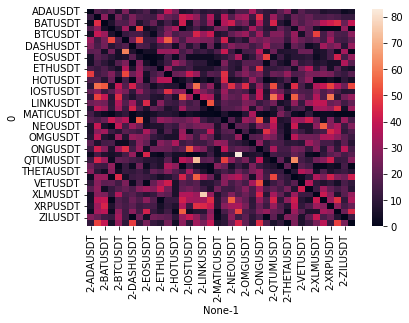

In [4]:
data = []
for i in range(df_close.shape[1]):
    for j in range(df_close.shape[1]):
        currency_1 = df_close.columns[i]
        currency_2 = df_close.columns[j]
        #volatility(currency_1, currency_2, 90)
        ratio = df_close[currency_1]/df_close[currency_2]
        zscore = (ratio-ratio.mean())/ratio.std()
        signal = ((zscore.shift(1)>0) & (zscore<=0)) | ((zscore.shift(1)<=0) & (zscore>0))
        num = len(signal[signal])
        data.append([currency_1, currency_2, num])
data2 = pd.DataFrame(data).sort_values(2)
# fig, ax = plt.subplots(figsize=(10,10)
sns.heatmap(data2.set_index([0,1]).unstack())

In [9]:
data2

,0,1,2
0,BTCUSDT,BTCUSDT,0
663,VETUSDT,VETUSDT,0
624,NULSUSDT,NULSUSDT,0
585,ICXUSDT,ICXUSDT,0
546,ETCUSDT,ETCUSDT,0
...,...,...,...
1322,ENJUSDT,CELRUSDT,61
203,QTUMUSDT,TRXUSDT,63
200,QTUMUSDT,IOTAUSDT,73
437,XLMUSDT,LINKUSDT,77


In [8]:
data2.set_index([0,1])

2
0        1           
BTCUSDT  BTCUSDT    0
VETUSDT  VETUSDT    0
NULSUSDT NULSUSDT   0
ICXUSDT  ICXUSDT    0
ETCUSDT  ETCUSDT    0
...                ..
ENJUSDT  CELRUSDT  61
QTUMUSDT TRXUSDT   63
         IOTAUSDT  73
XLMUSDT  LINKUSDT  77
ONTUSDT  NULSUSDT  83

[1444 rows x 1 columns]

In [ ]:
threshold = 90
data3 = data2[data2[0]!=data2[1]]
data3[data3[2]>threshold]

# 相關性

In [12]:
def correlation(currency_1, currency_2, threshold = None):
    corr = pd.concat([df_close[currency_1], df_close[currency_2]], axis=1).corr().iloc[1,0]
    print(corr)
    if corr>threshold:
        return True
    else:
        return False

In [13]:
correlation('BTCUSDT', 'ETHUSDT')

0.9024830881787547


TypeError: '>' not supported between instances of 'float' and 'NoneType'

In [ ]:
sns.heatmap(df_close.corr())

In [ ]:
threshold = 0.8
kk = df_close.corr().stack().sort_values().reset_index()
kk = kk[kk['level_0']!=kk['level_1']]
kk[kk[0]>threshold]

# 距離

In [ ]:
data = []
for i in range(df_close.shape[1]):
    for j in range(df_close.shape[1]):
        currency_1 = df_close.columns[i]
        currency_2 = df_close.columns[j]
        zscore_1 = (df_close[currency_1]-df_close[currency_1].mean())/df_close[currency_1].std()
        zscore_2 = (df_close[currency_2]-df_close[currency_2].mean())/df_close[currency_2].std()
        num = ((zscore_1-zscore_2)**2).sum()
        data.append([currency_1, currency_2, num])
data2 = pd.DataFrame(data).sort_values(2)
sns.heatmap(data2.set_index([0,1]).unstack())

In [ ]:
threshold = 90
data3 = data2[data2[0]!=data2[1]]
data3[data3[2]<threshold]